## Project Week8 Markov chain

* We have anonymously tracked the movement of all DOODL customers during a five-day week. 
* In the following files you find tabular data indicating where customers spent their time. 

Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:
1. Calculate the total number of customers in each section
2. Calculate the total number of customers in each section over time
3. Display the number of customers at checkout over time
4. Calculate the time each customer spent in the market
5. Calculate the total number of customers present in the supermarket over time.
6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

Hint for working with the data:
* extract a single customer ID and see what you can get done for that one before trying the same for all.
* if you have a timestamp, this one usually belongs in the index.
* if you are wondering what happened in the minutes for which you have no data: all customers stay where they are.
* consider .resample() to fill up the minutes in between
* where was customer #7 on Monday at 7:06? This is a good customer to look at in more detail

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [2]:
def datetime_index(df):
    df['datetime'] = pd.to_datetime(df['timestamp']) # convert column to datetime object
    df.set_index('datetime', inplace=True) # set column 'datetime' to index
    #del df['timestamp']


In [3]:
mon = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/monday.csv', sep=';', parse_dates=True)
tue = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/tuesday.csv', sep=';', parse_dates=True)
wed = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/wednesday.csv', sep=';', parse_dates=True)
thu = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/thursday.csv', sep=';', parse_dates=True)
fri = pd.read_csv('/Users/Carina/Documents/SpicedAcademy/Week8/friday.csv', sep=';', parse_dates=True)

In [4]:
# One complete dataframe:

df = pd.concat([mon, tue, wed, thu, fri])
df['datetime'] = pd.to_datetime(df['timestamp'])
df.head(2)

,timestamp,customer_no,location,datetime
0,2019-09-02 07:03:00,1,dairy,2019-09-02 07:03:00
1,2019-09-02 07:03:00,2,dairy,2019-09-02 07:03:00


In [5]:
df['time'] = df['datetime'].dt.time
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['date'] = df['datetime'].dt.date
df.set_index('datetime', inplace=True)

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df.head(3)

,timestamp,customer_no,location,time,hour,day,month,date
datetime,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02


## 1. Calculate the total number of customers in each section

In [8]:
total_cust = pd.DataFrame(df.groupby('location').count()['customer_no'])

In [9]:
total_cust

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'supermarket section')]

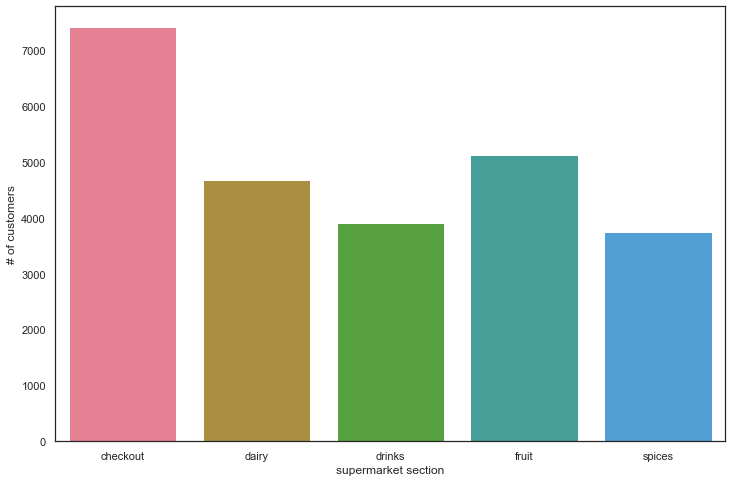

In [10]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.barplot(x=total_cust.index, y=total_cust['customer_no'], data=total_cust)
ax.set(xlabel='supermarket section', ylabel='# of customers')

## 2. Calculate the total number of customers in each section over time

In [11]:
customers_over_time = pd.DataFrame(df.groupby(['location','hour'])['customer_no'].count())
customers_over_time.fillna(0, inplace=True)
customers_over_time = pd.DataFrame(customers_over_time)
customers_over_time.reset_index(level=0, inplace=True)
customers_over_time.head(5)

,location,customer_no
hour,,
7,checkout,454
8,checkout,677
9,checkout,455
10,checkout,427
11,checkout,342


In [12]:
customers_over_time.reset_index(inplace=True)
customers_over_time

,hour,location,customer_no
0,7,checkout,454
1,8,checkout,677
2,9,checkout,455
3,10,checkout,427
4,11,checkout,342
...,...,...,...
70,17,spices,269
71,18,spices,346
72,19,spices,389
73,20,spices,246


[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'time of the day [h]')]

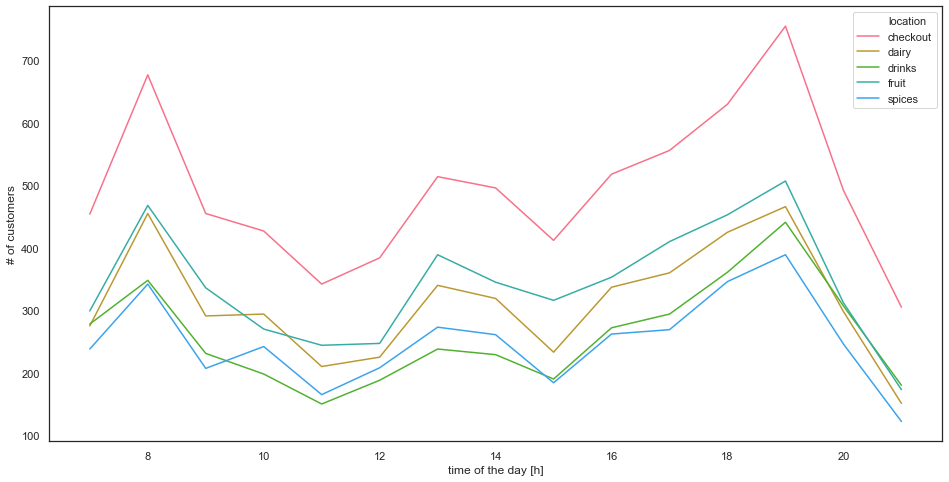

In [13]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', hue='location', data=customers_over_time)
ax.set(xlabel='time of the day [h]', ylabel='# of customers')

## 3. Display the number of customers at checkout over time

[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'time of the day [h]')]

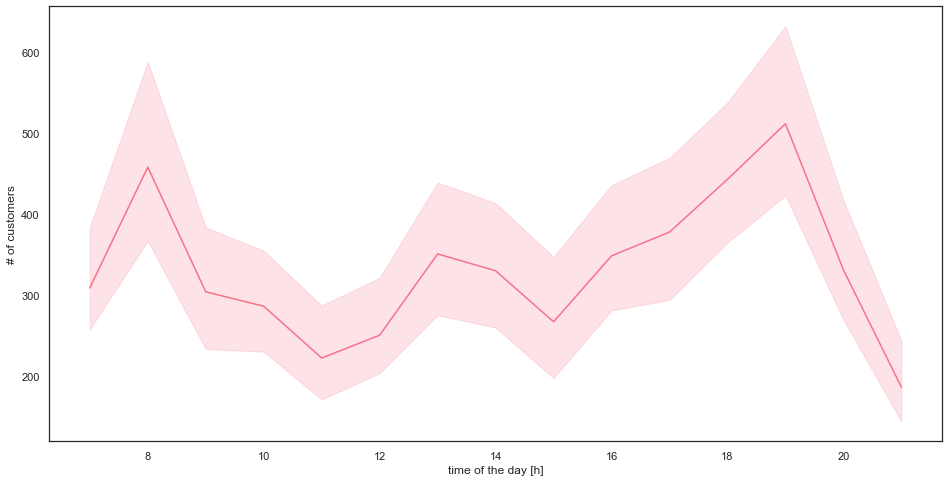

In [14]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', data=customers_over_time)
ax.set(xlabel='time of the day [h]', ylabel='# of customers')

## 4. Calculate the time each customer spent in the market

In [15]:
df.head(5)

,timestamp,customer_no,location,time,hour,day,month,date
datetime,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,07:04:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,07:04:00,7,0,9,2019-09-02


In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [17]:
arrival = pd.DataFrame(df.groupby(['day', 'customer_no'])['timestamp'].min())
departure = pd.DataFrame(df.groupby(['day', 'customer_no'])['timestamp'].max())

In [18]:
arrival.tail(3)

timestamp
day customer_no                    
4   1508        2019-09-06 21:48:00
    1509        2019-09-06 21:50:00
    1510        2019-09-06 21:50:00

In [19]:
departure.tail(3)

timestamp
day customer_no                    
4   1508        2019-09-06 21:50:00
    1509        2019-09-06 21:50:00
    1510        2019-09-06 21:50:00

In [20]:
shopping_time = pd.DataFrame(departure['timestamp'] - arrival['timestamp'])
shopping_time.reset_index(inplace=True)
shopping_time.tail(3)

,day,customer_no,timestamp
7442,4,1508,00:02:00
7443,4,1509,00:00:00
7444,4,1510,00:00:00


In [21]:
shopping_time = shopping_time[shopping_time.timestamp != '00:00:00']
shopping_time.tail(3)

,day,customer_no,timestamp
7439,4,1505,00:01:00
7441,4,1507,00:02:00
7442,4,1508,00:02:00


In [22]:
average_shopping_time = shopping_time['timestamp'].mean()
average_shopping_time

Timedelta('0 days 00:06:14.862829')

Text(0, 0.5, '# of customers')

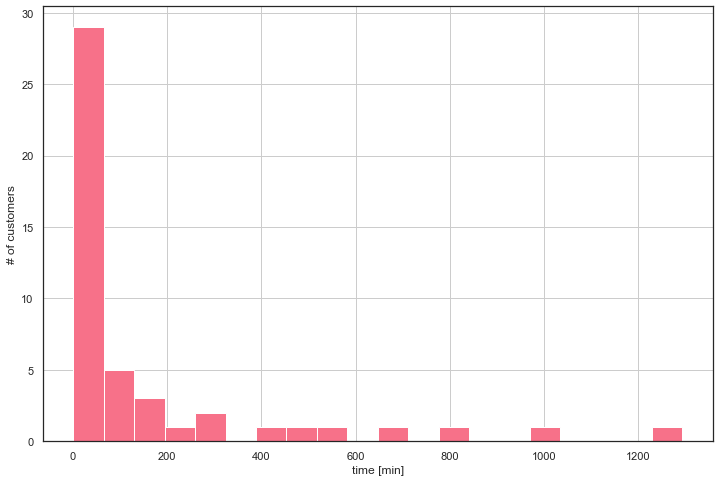

In [23]:
plt.figure(figsize=(12,8))
shopping_time['timestamp'].value_counts().hist(bins = 20)
plt.xlabel('time [min]')
plt.ylabel('# of customers')

In [24]:
cust_present = pd.DataFrame(shopping_time.reset_index().groupby('timestamp')['customer_no'].count())
cust_present.reset_index(inplace = True)
cust_present.head(3)

,timestamp,customer_no
0,00:01:00,1293
1,00:02:00,1004
2,00:03:00,822


[(-1, 1500)]

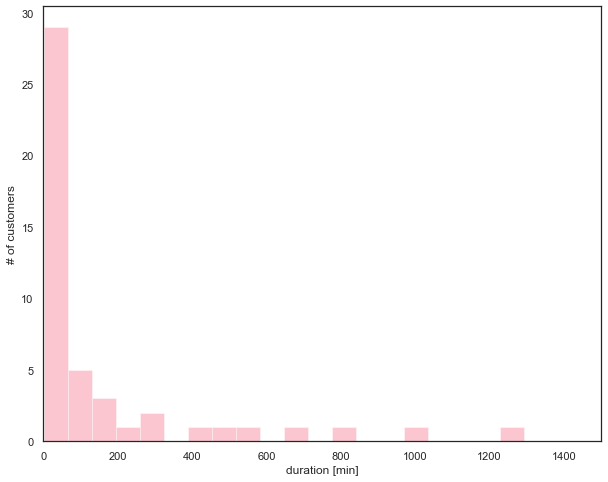

In [25]:
# Histogram using seaborn:
plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.set(style='white', palette='husl')
ax = sns.distplot(cust_present['customer_no'], hist=True, bins=20, kde=False)
ax.set(xlabel='duration [min]', ylabel='# of customers')
ax.set(xlim=(-1, 1500))

[(-1, 1500)]

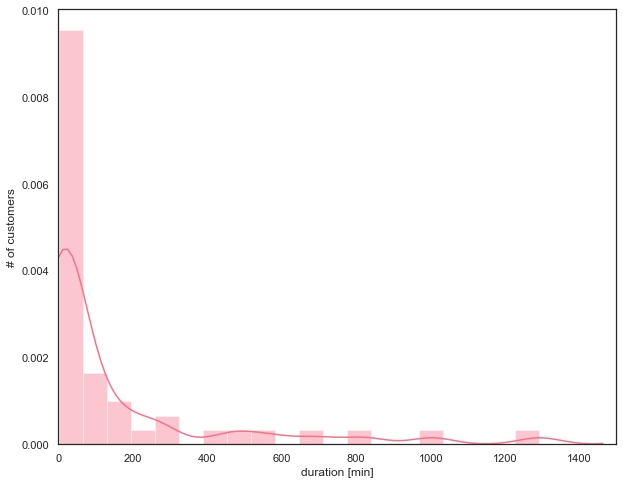

In [26]:
# This is not a histogram but a density (arae under the curve = 1):
plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.set(style='white', palette='husl')
ax = sns.distplot(cust_present['customer_no'], hist=True, bins=20, kde=True)
ax.set(xlabel='duration [min]', ylabel='# of customers')
ax.set(xlim=(-1, 1500))

## 5. Calculate the total number of customers present in the supermarket over time.

In [27]:
total_customers_over_time = pd.DataFrame(df.groupby('timestamp').count()['customer_no'])
total_customers_over_time.reset_index(level=0, inplace=True)
total_customers_over_time['hour'] = total_customers_over_time['timestamp'].dt.hour
total_customers_over_time.head(4)

,timestamp,customer_no,hour
0,2019-09-02 07:03:00,2,7
1,2019-09-02 07:04:00,6,7
2,2019-09-02 07:05:00,4,7
3,2019-09-02 07:06:00,8,7


[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'time of the day')]

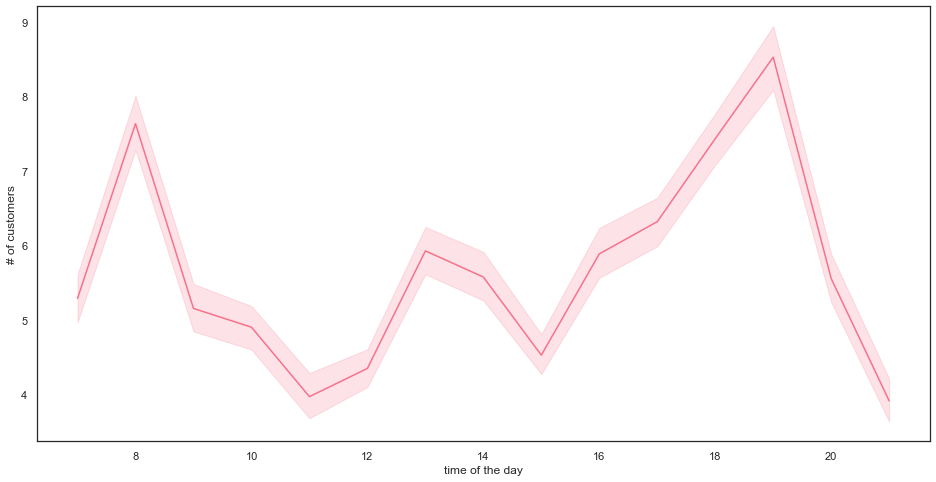

In [28]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', data=total_customers_over_time)
ax.set(xlabel='time of the day', ylabel='# of customers')

## 6. Analyze if the first section that customers visit follows a different pattern than the following ones

* Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [29]:
df.head(3)

,timestamp,customer_no,location,time,hour,day,month,date
datetime,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02


In [30]:
#these are the times when the customers enter the supermarket:
#df.groupby(['day', 'customer_no'])['time'].min()
#df['first'] = 0

## 7. Estimate the revenue: which is the most profitable section?

In [31]:
#revenue/minute in euros:

revenue = {'fruit':4, 'spices':3, 'dairy':5, 'drinks':6}

In [32]:
arrival2 = pd.DataFrame(df.groupby(['day', 'location', 'customer_no'])['timestamp'].min())
departure2 = pd.DataFrame(df.groupby(['day', 'location', 'customer_no'])['timestamp'].max())

In [33]:
shopping_time2 = pd.DataFrame(departure2['timestamp'] - arrival2['timestamp'])
shopping_time2.reset_index(inplace=True)
shopping_time2 = shopping_time2[shopping_time2.timestamp != '00:00:00']
shopping_time2.tail(10)

,day,location,customer_no,timestamp
21618,4,spices,1372,00:17:00
21633,4,spices,1399,00:11:00
21635,4,spices,1404,00:10:00
21640,4,spices,1420,00:11:00
21643,4,spices,1429,00:05:00
21646,4,spices,1435,00:14:00
21657,4,spices,1456,00:06:00
21660,4,spices,1464,00:06:00
21663,4,spices,1472,00:03:00
21664,4,spices,1477,00:04:00


In [34]:
shopping_time2.sort_values(by=['location'])
shopping_time2

,day,location,customer_no,timestamp
1441,0,dairy,6,00:21:00
1443,0,dairy,13,00:08:00
1451,0,dairy,33,00:03:00
1458,0,dairy,42,00:07:00
1459,0,dairy,43,00:13:00
...,...,...,...,...
21646,4,spices,1435,00:14:00
21657,4,spices,1456,00:06:00
21660,4,spices,1464,00:06:00
21663,4,spices,1472,00:03:00


In [35]:
shopping_time2['location'].unique()

array(['dairy', 'drinks', 'fruit', 'spices'], dtype=object)

In [36]:
shopping_time3 = pd.DataFrame(shopping_time2.groupby(['day','location'])['timestamp'].sum())
shopping_time3

timestamp
day location          
0   dairy     22:54:00
    drinks    14:28:00
    fruit     21:16:00
    spices    17:51:00
1   dairy     18:18:00
    drinks    12:08:00
    fruit     17:27:00
    spices    15:17:00
2   dairy     20:24:00
    drinks    11:43:00
    fruit     19:16:00
    spices    17:39:00
3   dairy     23:37:00
    drinks    16:03:00
    fruit     21:23:00
    spices    21:11:00
4   dairy     21:49:00
    drinks    14:26:00
    fruit     23:02:00
    spices    15:45:00

In [37]:
#shopping_time3 = shopping_time3.stack('day')
shopping_time3 = shopping_time3.unstack('day')
shopping_time3.head()

timestamp                                    
day              0        1        2        3        4
location                                              
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00

In [38]:
shopping_time3['mean'] = shopping_time3.mean(axis=1)
shopping_time3.head()

timestamp                                         mean
day              0        1        2        3        4         
location                                                       
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00 21:24:24
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00 13:45:36
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00 20:28:48
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00 17:32:36

In [39]:
shopping_time3['mean'] = shopping_time3['mean'].dt.seconds.div(60).astype(int)
shopping_time3

timestamp                                      mean
day              0        1        2        3        4      
location                                                    
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052

In [40]:
shopping_time3['revenue'] = shopping_time3.index.map(revenue)
shopping_time3.head()

timestamp                                      mean revenue
day              0        1        2        3        4              
location                                                            
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284       5
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3

In [41]:
shopping_time3['total_revenue'] = shopping_time3['mean'] * shopping_time3['revenue']
shopping_time3

timestamp                                      mean revenue  \
day              0        1        2        3        4                 
location                                                               
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284       5   
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6   
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4   
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3   

         total_revenue  
day                     
location                
dairy             6420  
drinks            4950  
fruit             4912  
spices            3156

In [42]:
shopping_time3.tail(3)

timestamp                                      mean revenue  \
day              0        1        2        3        4                 
location                                                               
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6   
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4   
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3   

         total_revenue  
day                     
location                
drinks            4950  
fruit             4912  
spices            3156

[Text(0, 0.5, 'revenue per week [€]'), Text(0.5, 0, 'supermarket section')]

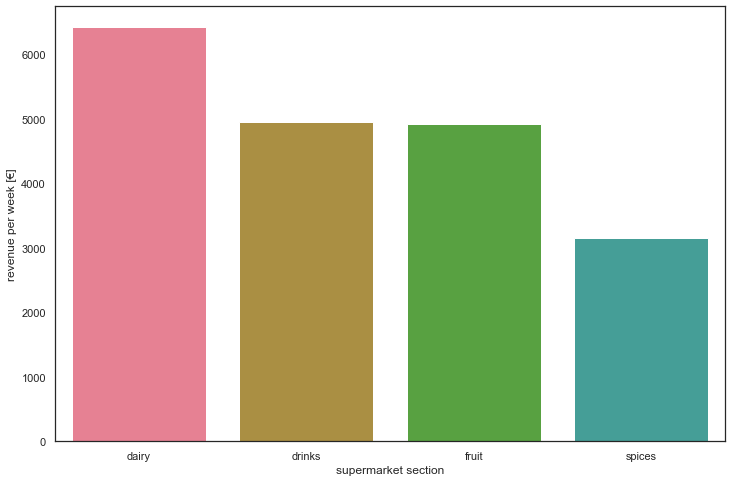

In [43]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.barplot(x=shopping_time3.index, y=shopping_time3['total_revenue'], data=shopping_time3)
ax.set(xlabel='supermarket section', ylabel='revenue per week [€]')

## 8. Transition probability matrix

In [49]:
df2 = df.copy()
df2.head()

,timestamp,customer_no,location,time,hour,day,month,date
datetime,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,07:04:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,07:04:00,7,0,9,2019-09-02


In [51]:
df2 = df2.groupby(['day', 'customer_no']).resample('1T').ffill()

ValueError: 'day' is both an index level and a column label, which is ambiguous.

In [52]:
df2.head()

timestamp  customer_no  \
day customer_no datetime                                               
0   1           2019-09-02 07:03:00 2019-09-02 07:03:00            1   
                2019-09-02 07:04:00 2019-09-02 07:03:00            1   
                2019-09-02 07:05:00 2019-09-02 07:05:00            1   
    2           2019-09-02 07:03:00 2019-09-02 07:03:00            2   
                2019-09-02 07:04:00 2019-09-02 07:03:00            2   

                                     location      time  hour  day  month  \
day customer_no datetime                                                    
0   1           2019-09-02 07:03:00     dairy  07:03:00     7    0      9   
                2019-09-02 07:04:00     dairy  07:03:00     7    0      9   
                2019-09-02 07:05:00  checkout  07:05:00     7    0      9   
    2           2019-09-02 07:03:00     dairy  07:03:00     7    0      9   
                2019-09-02 07:04:00     dairy  07:03:00     7    0      9   

                                           date  
day customer_no datetime                         
0   1           2019-09-02 07:03:00  2019-09-02  
                2019-09-02 07:04:00  2019-09-02  
                2019-09-02 07:05:00  2019-09-02  
    2           2019-09-02 07:03:00  2019-09-02  
                2019-09-02 07:04:00  2019-09-02

In [56]:
df2.drop(columns = 'customer_no', inplace = True)
df2.drop(columns= 'datetime', inplace=True)
df2.drop(columns= 'day', inplace=True)

In [63]:
df2.reset_index(inplace=True)
df2.head(10)

,day,customer_no,datetime,timestamp,location,time,hour,month,date
0,0,1,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02
1,0,1,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02
2,0,1,2019-09-02 07:05:00,2019-09-02 07:05:00,checkout,07:05:00,7,9,2019-09-02
3,0,2,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02
4,0,2,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02
5,0,2,2019-09-02 07:05:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02
6,0,2,2019-09-02 07:06:00,2019-09-02 07:06:00,checkout,07:06:00,7,9,2019-09-02
7,0,3,2019-09-02 07:04:00,2019-09-02 07:04:00,dairy,07:04:00,7,9,2019-09-02
8,0,3,2019-09-02 07:05:00,2019-09-02 07:04:00,dairy,07:04:00,7,9,2019-09-02
9,0,3,2019-09-02 07:06:00,2019-09-02 07:06:00,checkout,07:06:00,7,9,2019-09-02


In [64]:
df2['before'] = df2.groupby(['day', 'customer_no'])['location'].shift(1)
df2.head(10)

,day,customer_no,datetime,timestamp,location,time,hour,month,date,before
0,0,1,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02,NaN
1,0,1,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02,dairy
2,0,1,2019-09-02 07:05:00,2019-09-02 07:05:00,checkout,07:05:00,7,9,2019-09-02,dairy
3,0,2,2019-09-02 07:03:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02,NaN
4,0,2,2019-09-02 07:04:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02,dairy
5,0,2,2019-09-02 07:05:00,2019-09-02 07:03:00,dairy,07:03:00,7,9,2019-09-02,dairy
6,0,2,2019-09-02 07:06:00,2019-09-02 07:06:00,checkout,07:06:00,7,9,2019-09-02,dairy
7,0,3,2019-09-02 07:04:00,2019-09-02 07:04:00,dairy,07:04:00,7,9,2019-09-02,NaN
8,0,3,2019-09-02 07:05:00,2019-09-02 07:04:00,dairy,07:04:00,7,9,2019-09-02,dairy
9,0,3,2019-09-02 07:06:00,2019-09-02 07:06:00,checkout,07:06:00,7,9,2019-09-02,dairy


In [65]:
(df2['before'] + '->' + df2['location']).value_counts()

dairy->dairy        13095
fruit->fruit         7586
drinks->drinks       5821
fruit->checkout      2555
spices->spices       2524
drinks->checkout     2096
dairy->checkout      1825
fruit->dairy         1219
spices->dairy        1213
dairy->drinks        1041
spices->drinks       1024
spices->checkout      941
dairy->spices         913
dairy->fruit          886
drinks->fruit         855
drinks->spices        846
fruit->drinks         697
fruit->spices         644
spices->fruit         571
drinks->dairy         106
dtype: int64

In [67]:
df3 = df2.groupby(['location', 'before'])['customer_no'].count()
df3.head(3)

location  before
checkout  dairy     1825
          drinks    2096
          fruit     2555
Name: customer_no, dtype: int64

In [68]:
ct = df3.unstack()
ct

before,dairy,drinks,fruit,spices
location,,,,
checkout,1825,2096,2555,941
dairy,13095,106,1219,1213
drinks,1041,5821,697,1024
fruit,886,855,7586,571
spices,913,846,644,2524


In [69]:
p = (ct.T / ct.sum(axis=1)).T
p

before,dairy,drinks,fruit,spices
location,,,,
checkout,0.246056,0.282594,0.344479,0.126871
dairy,0.837651,0.006781,0.077976,0.077592
drinks,0.121286,0.678201,0.081207,0.119306
fruit,0.089513,0.086381,0.766417,0.057688
spices,0.185305,0.171707,0.130708,0.512279


In [ ]:
# Alternative one-liner:

In [72]:
pd.crosstab(df2['location'], df2['before'], normalize = 0)

before,dairy,drinks,fruit,spices
location,,,,
checkout,0.246056,0.282594,0.344479,0.126871
dairy,0.837651,0.006781,0.077976,0.077592
drinks,0.121286,0.678201,0.081207,0.119306
fruit,0.089513,0.086381,0.766417,0.057688
spices,0.185305,0.171707,0.130708,0.512279
